## Requirements

### Web-Scraping
#### 1. Take the base wg-gesucht URL and scrape the shared flats listed on the website
#### 2. most important data points are price, room size and number of flat mates

### Data Analyis
#### 1. Correlation analysis of room price and room size. Hypothesis: positive correlation
#### 2. Correlation analysis of room price and number of flat mates. Hypothesis: negative correlation

### Import all neccessary libraries

In [1]:
import requests
import random
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from datetime import datetime

    Initialization of the Dataframe with columns for scrapable data

In [ ]:
data = {'Bewohner': [], 'Eintrag': [], 'Miete': [], 'Groese': [] , 'Stadtteil': [], 'frei ab': [], 'frei bis': []}
df = pd.DataFrame(data=data)
print(df ,len(df))


    Setup of proxie and user-agent caroussel. These will be rotated between requests to avoid bot-detection

In [4]:
proxies = [
    'http://24.106.221.230:53281',
    'http://118.70.12.171:53281',
    'http://198.199.86.11:8080',
    'http://107.173.80.140:9000',
    'http://159.203.61.169:8080',
    'http://134.209.29.120:3128',
    'http://192.140.42.83:31511',
    'http://20.187.77.5:80',
    'http://64.225.8.191:9986',
    'http://198.59.191.234:8080',
    'http://51.178.47.12:80',
    'http://82.180.163.163:80',
    'http://158.69.72.138:9300',
    'http://198.49.68.80:80',
    'http://51.15.192.229:8080',
    'http://161.35.70.249:8080',
    'http://143.110.232.177:80',
    'http://154.118.228.212:80',
    'http://177.87.144.122:5566',
    'http://200.25.254.193:54240',
    'http://82.180.163.163:80'
    ]
userAgents = [
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
]

    Request and scrape functions

    makeRequest: takes URL and makes request using randomly picked proxy and user-agent
    scrapeTable: takes in the tbody element of the page, extracts datapoints through getters and adds data to the dataframe

In [102]:
def makeRequest(url):
    try:
        randomNum = random.randint(0, len(proxies) - 1)
        proxy = {proxies[randomNum][0 : 4] : proxies[randomNum]}
        print('Current Proxy: ', proxy)
        
        return requests.get(url,
                            #proxies=proxy,
                            #headers={'User-Agent' : userAgents[random.randint(0, len(userAgents) -1)]},
                            timeout=5)
    except:
        print("PROBLEM WHILE MAKING REQUEST")

def scrapeTable(tbody) -> None:
    data = []
    rows = tbody.findAll('tr')
    for row in rows:
        data.append(getFlatmates(row))
        data.append(getDatePosted(row))
        data.append(getPrice(row))
        data.append(getRoomSize(row))
        data.append(getNeighborhood(row))
        data.append(getMoveInDate(row))
        data.append(getMoveOutDate(row))
        
        df.loc[len(df) + 1] = data
        data.clear()
    
def getFlatmates(row):
    flatMatesDict = row.findAll('td')[1].span.attrs
    return flatMatesDict.get('title')

def getDatePosted(row):
    return row.findAll('td')[2].span.text.strip()

def getPrice(row):
    return row.findAll('td')[3].b.text.strip()

def getRoomSize(row):
    return row.findAll('td')[4].span.text.strip()

def getNeighborhood(row):
    return  row.findAll('td')[5].span.text.strip()

def getMoveInDate(row):
    return  row.findAll('td')[6].span.text.strip()

def getMoveOutDate(row):
    date = row.findAll('td')[7].a
    if date.find('span'):
        return date.find('span').text.strip()
    
    return ""

    Loop through wg-gesucht pagination and scrape the tbody element on each page

In [115]:
for i in range(80, 90):
    print(f'Page: {i}' end=' ')
    res = makeRequest(f'https://www.wg-gesucht.de/wg-zimmer-in-Mannheim.85.0.0.{i}.html')
    try: 
        page = BeautifulSoup(res.content, 'html.parser')
        scrapeTable(page.findAll('tbody')[0])
    except Exception as ex:
        print(ex)
        print(page.prettify())
        break

page: 60
Current Proxy:  {'http': 'http://161.35.70.249:8080'}
page: 61
Current Proxy:  {'http': 'http://177.87.144.122:5566'}
page: 62
Current Proxy:  {'http': 'http://82.180.163.163:80'}
page: 63
Current Proxy:  {'http': 'http://64.225.8.191:9986'}
page: 64
Current Proxy:  {'http': 'http://51.178.47.12:80'}
page: 65
Current Proxy:  {'http': 'http://177.87.144.122:5566'}
page: 66
Current Proxy:  {'http': 'http://82.180.163.163:80'}
page: 67
Current Proxy:  {'http': 'http://118.70.12.171:53281'}
page: 68
Current Proxy:  {'http': 'http://82.180.163.163:80'}
page: 69
Current Proxy:  {'http': 'http://159.203.61.169:8080'}
page: 70
Current Proxy:  {'http': 'http://24.106.221.230:53281'}
page: 71
Current Proxy:  {'http': 'http://200.25.254.193:54240'}
page: 72
Current Proxy:  {'http': 'http://64.225.8.191:9986'}
page: 73
Current Proxy:  {'http': 'http://51.15.192.229:8080'}
page: 74
Current Proxy:  {'http': 'http://20.187.77.5:80'}
page: 75
Current Proxy:  {'http': 'http://177.87.144.122:55

In [116]:
print(df.head())
df = df.drop(df[df.Groese == 'n.a.'].index)
print(len(df))

            Bewohner     Eintrag Miete Groese   
1  3er WG (0w,2m,0d)  17.05.2023  250€   15m²  \
2  2er WG (1w,0m,0d)  17.05.2023  565€   16m²   
3  4er WG (0w,2m,0d)  17.05.2023  510€   21m²   
4  4er WG (0w,2m,0d)  17.05.2023  520€   19m²   
5  4er WG (3w,0m,0d)  17.05.2023  470€   15m²   

                                           Stadtteil     frei ab    frei bis  
1  Mannheim\n                                    ...  01.06.2023  30.08.2023  
2  Mannheim\n                                    ...  01.06.2023              
3  Mannheim\n                                    ...  01.06.2023              
4  Mannheim\n                                    ...  01.06.2023              
5  Mannheim\n                                    ...  01.06.2023              
1600


    Clean and extract data into lists

In [109]:
rentPrice = df.iloc[:, 2].tolist()
roomSize = df.iloc[:, 3].tolist()
flatmates = df.iloc[:, 0].tolist()

for i, price in enumerate(rentPrice):
    rentPrice[i] = int(price[0:len(price) - 1])

for i, room in enumerate(roomSize):
    roomSize[i] = int(room[0: len(room) - 2])

for i, flat in enumerate(flatmates):
    endIndex = flat.find('er')
    flatmates[i] = int(flat[0:endIndex])

moveInDates = []
for i, date in enumerate(df.iloc[:, 5].tolist()):
    if date !='aktuell' and date != '':
        moveInDates.append(datetime.strptime(date, "%d.%m.%Y").date())
    else: 
        moveInDates.append(datetime.today().date())

males = []
females = []

malePercentage = []
femalePercentage = []
for i, el in enumerate(df.iloc[:, 0].tolist()):
    begin = el.find('(') + 1
    end = el.find(')')
    inhabitants = el[begin : end]

    femInhabitants = int(inhabitants[0: inhabitants.find('w')])
    maleInhabitants = int(inhabitants[inhabitants.find('w') + 2: inhabitants.find('m')])
    
    femPercent = femInhabitants / flatmates[i]
    malePercent = maleInhabitants / flatmates[i]

    males.append(maleInhabitants)
    females.append(femInhabitants)
    malePercentage.append(malePercent)
    femalePercentage.append(femPercent)


# print('Move IN Date:',len(moveInDates), moveInDates)
# print('Rent Price:',len(rentPrice), rentPrice)
# print('Room Size:',len(roomSize), roomSize)
# print('No. Flatmates',len(flatmates), flatmates)
# print('Male Percentage',len(malePercentage), malePercentage)
# print('Female Percentage', len(femalePercentage), femalePercentage)
# zScore = np.abs(stats.zscore(rentPrice))
# print(len(zScore), zScore)

0w,2m,0d
1w,0m,0d
0w,2m,0d
0w,2m,0d
3w,0m,0d
2w,1m,0d
0w,1m,0d
0w,1m,0d
1w,0m,0d
0w,4m,0d
1w,2m,0d
2w,1m,0d
2w,0m,1d
0w,5m,0d
2w,10m,0d
1w,2m,0d
0w,0m,0d
0w,3m,0d
0w,1m,0d
1w,1m,0d
0w,1m,0d
1w,1m,0d
0w,1m,0d
6w,3m,0d
6w,3m,0d
0w,2m,0d
1w,2m,0d
2w,0m,0d
1w,0m,0d
0w,1m,0d
0w,3m,0d
1w,2m,0d
2w,0m,0d
2w,2m,0d
2w,2m,0d
1w,2m,0d
0w,1m,0d
0w,3m,0d
2w,0m,0d
0w,1m,0d


In [106]:
timeToMoveIn = []
for i, date in enumerate(moveInDates):
    time = (date - datetime.today().date()).days if (date - datetime.today().date()).days >= 0 else 0
    timeToMoveIn.append(time)

40


    Add cleaned data into new dataframe columns

In [107]:
df['flatmates'] = flatmates
df['time to move in'] = timeToMoveIn
df['Male Inhabitants'] = males
df['Female Inhabitants'] = females
df['% Male Flatmates'] = malePercentage
df['% Female Flatmates'] = femalePercentage


    export dataframe as excel sheet

In [108]:
df.to_excel('wg_data_test.xlsx')

    Visualize data with scatter plots
    Complete correlation analysis 

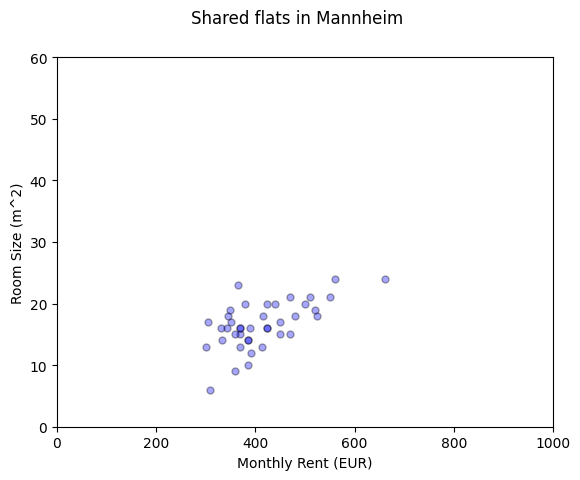

PearsonRResult(statistic=0.6100126972701618, pvalue=2.929519416165102e-05)

In [59]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
#ax.grid()
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0, 1000)
plt.ylim(0,60)
plt.xlabel('Monthly Rent (EUR)')
plt.ylabel('Room Size (m^2)')
plt.scatter(rentPrice, roomSize, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(rentPrice, roomSize)


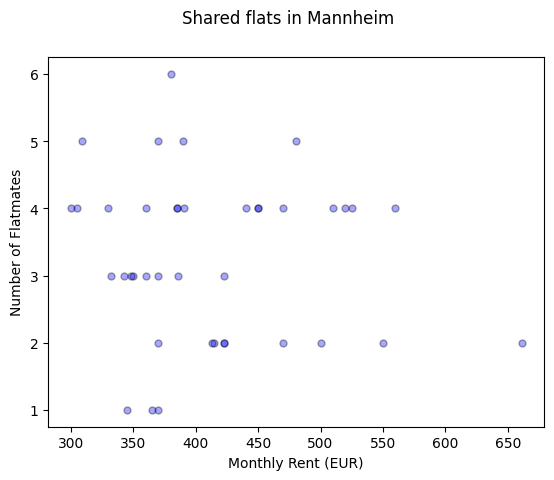

PearsonRResult(statistic=-0.0827119953375686, pvalue=0.611874574362973)

In [60]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
plt.xlabel('Monthly Rent (EUR)')
plt.ylabel('Number of Flatmates')
plt.scatter(rentPrice, flatmates, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(rentPrice, flatmates)

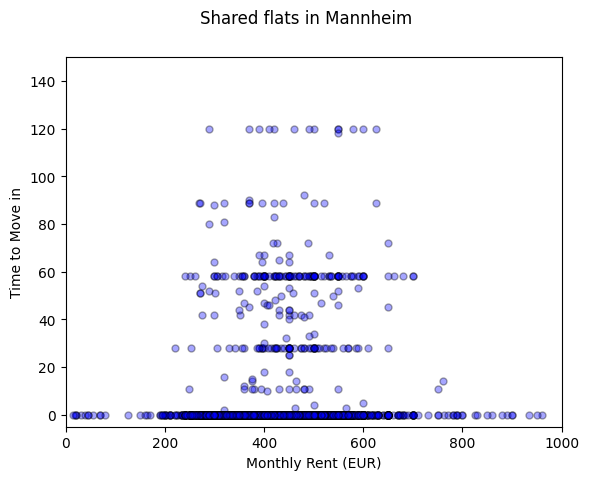

PearsonRResult(statistic=-0.13825315864791657, pvalue=2.7876699332369922e-19)

In [60]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
plt.xlabel('Monthly Rent (EUR)')
plt.ylabel('Time to Move in')
plt.xlim(0, 1000)
plt.ylim(-5, 150)
plt.scatter(rentPrice, timeToMoveIn, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(rentPrice, flatmates)

NameError: name 'roomSize' is not defined

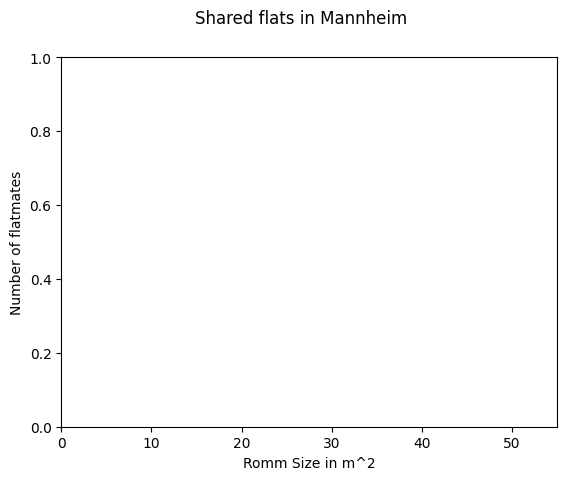

In [2]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
plt.ylabel('Number of flatmates')
plt.xlabel('Romm Size in m^2')
#plt.yscale('log')
plt.xlim(0, 55)

plt.scatter(roomSize, flatmates, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(roomSize, flatmates)

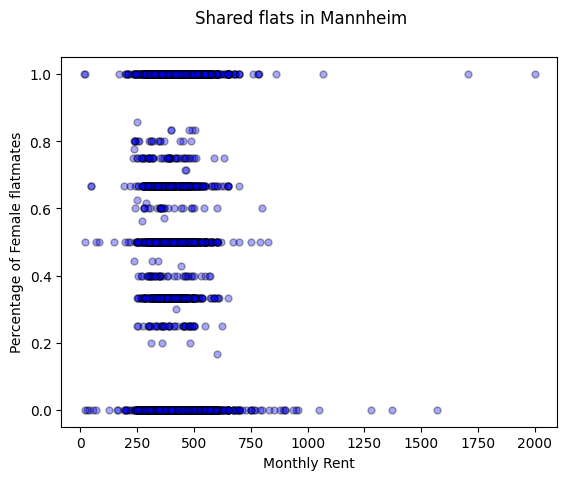

PearsonRResult(statistic=-0.010280863083506179, pvalue=0.5064679334834624)

In [62]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
plt.ylabel('Percentage of Female flatmates')
plt.xlabel('Monthly Rent')
#plt.xscale('log')
#plt.yscale('log')

plt.scatter(rentPrice, femalePercentage, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(rentPrice, femalePercentage)

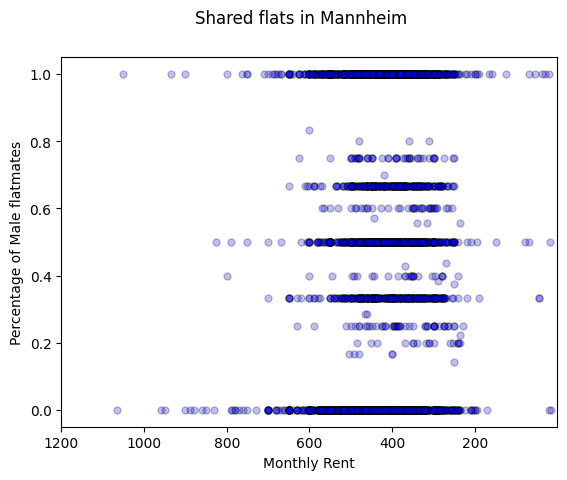

PearsonRResult(statistic=-0.09231277997887251, pvalue=2.2610924039886716e-09)

In [67]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
plt.ylabel('Percentage of Male flatmates')
plt.xlabel('Monthly Rent')
plt.xlim(1200)
#plt.xscale('log')
#plt.yscale('log')

plt.scatter(rentPrice, malePercentage, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.25)
plt.show()

scipy.stats.pearsonr(rentPrice, malePercentage)